In [1]:
import pandas as pd
import numpy as np


from sklearn import preprocessing as prep
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import RidgeClassifierCV

import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
import kaleido

# Boston Housing Prediction

Our target is to capture those owner whose house value is greater than the median value of all houses.
<ol>
    <li>CRIM - per capita crime rate by town</li>
    <li>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.</li>
    <li>INDUS - proportion of non-retail business acres per town.</li>
    <li>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)</li>
    <li>NOX - nitric oxides concentration (parts per 10 million)</li>
    <li>RM - average number of rooms per dwelling</li>
    <li>AGE - proportion of owner-occupied units built prior to 1940</li>
    <li>DIS - weighted distances to five Boston employment centres</li>
    <li>RAD - index of accessibility to radial highways</li>
    <li>TAX - full-value property-tax rate per \$10,000</li>
    <li>PTRATIO - pupil-teacher ratio by town</li>
    <li>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
    <li>LSTAT - % lower status of the population</li>
    <li>MEDV - Median value of owner-occupied homes in \$1000's</li>
    <li>CAT. MEDV - Median value of owner-occupied homes in \$1000's</li>
</ol>

## EDA

In [2]:
dfBH = pd.read_csv('BostonHousing.csv')
dfBH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


* There is no any missing value in our data

In [3]:
dfBH.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


* The standard deviations of CRIM, ZN, CHAS, and CAT.MEDV are greater than their own mean, which indicates high variation between values, so we should normalize this data.

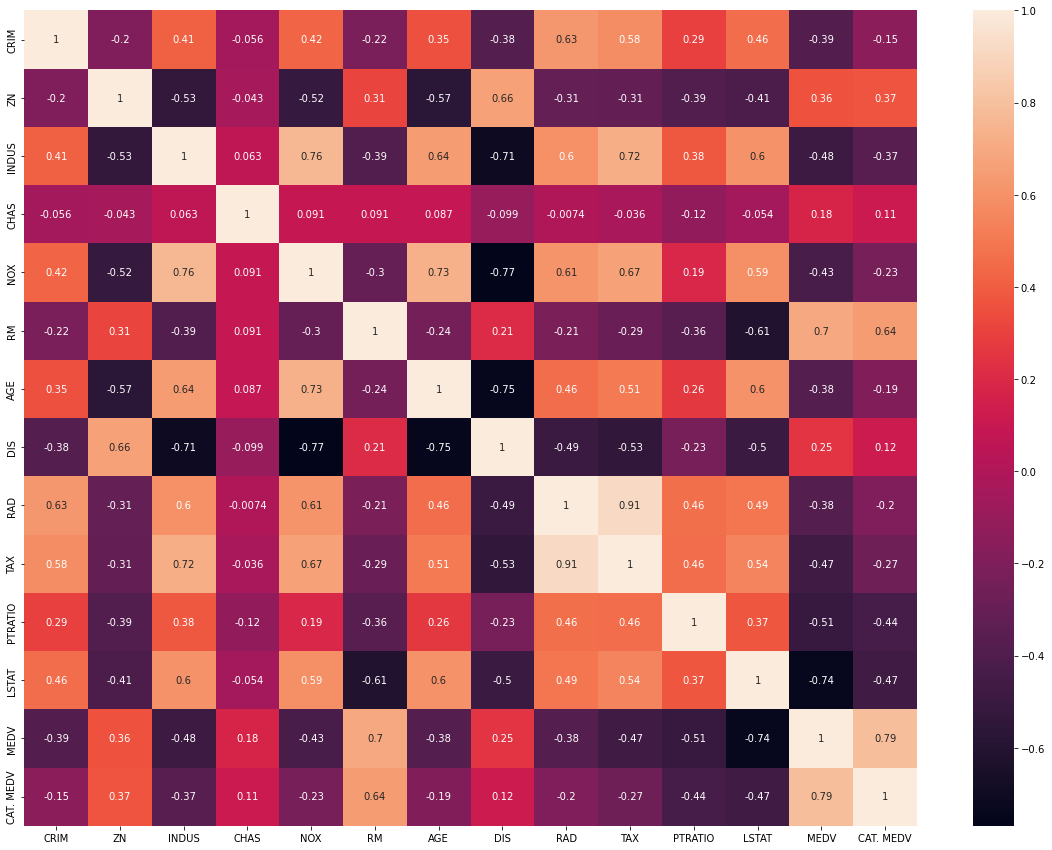

In [4]:
plt.figure(figsize=(20, 15))
sns.heatmap(dfBH.corr(),annot=True)
plt.show('png')

* I will choose a varaible as my predictor if its correaltion coefficient with CAT.MEDV is greater than 0.3, so ZN, INDUS, RM, PTRATIO, LSTAT, and MEDV will be choosen. However, we should remove MEDV from our predictors becasue understanding the relation between MEDV and CAT.MEDV is meaningless

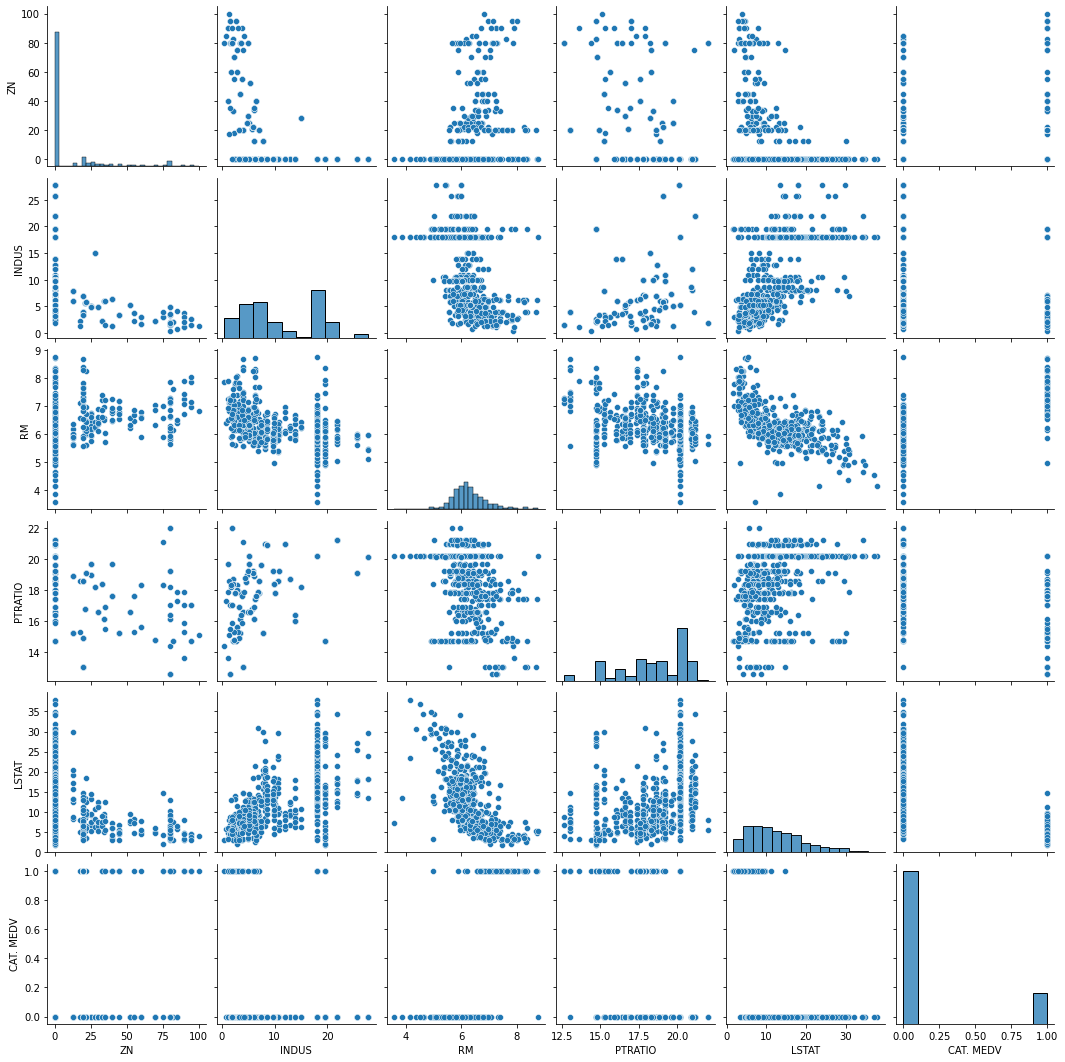

In [5]:
sns.pairplot(dfBH[['ZN', 'INDUS', 'RM', 'PTRATIO','LSTAT','CAT. MEDV']])

* There are many zero values in variable ZN.
* By observing variable CAT. MEDV, we can find this data imbalanced.
* Variable LSTAT seems to be a right-skewed distribution.

    Based on these facts, agian we should normalize our data.

## Data processing

In [6]:
# Split Data
predictors = ['ZN', 'INDUS', 'RM', 'PTRATIO','LSTAT']
X = dfBH[predictors] 
y = dfBH['CAT. MEDV'] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1089)
# Normalize Data
X_train_means = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_means)/X_train_std
X_test = (X_test - X_train_means)/X_train_std

## Benchmark-Lgistic Regression

In [7]:
# Run LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
# Store predicted probability
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
# make class predictions for the testing set
y_pred_class = log_reg.predict(X_test)

In [8]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)

# Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,1.00,1.00,0.00,0.23,0.13
1,0.1,0.95,0.18,0.05,0.60,0.84
2,0.2,0.95,0.14,0.05,0.67,0.88
3,0.3,0.90,0.13,0.10,0.65,0.88
4,0.4,0.90,0.07,0.10,0.77,0.93
5,0.5,0.85,0.06,0.15,0.76,0.93
6,0.6,0.80,0.04,0.20,0.78,0.94
7,0.7,0.75,0.02,0.25,0.81,0.95
8,0.8,0.60,0.01,0.40,0.73,0.94
9,0.9,0.45,0.00,0.55,0.62,0.93


* As shown in the table above, I will choose 0.7 as my threshold because F1_Score at 0.7 is greater than others. In addition, when we face imbalanced data, F1 score is a better choice to evaluate our model.
* I choose F1-Score as my performance measure because it is the combination of Recall and Precision, which means it can reflect whether our model can correctly identify positive cases and negative cases.

In [9]:
y_pred_class_lr = binarize([y_pred_prob],threshold=0.7)[0]

# Create Metrics for comparison
confusion_lr = metrics.confusion_matrix(y_test, y_pred_class_lr)
recall_value_lr = metrics.recall_score(y_test, y_pred_class_lr).round(3)
fpr_value_lr = (confusion_lr[0,1] / (confusion_lr[0,1] + confusion_lr[0,0]) ).round(2)
fnr_value_lr = (confusion_lr[1,0] / (confusion_lr[1,0] + confusion_lr[1,1]) ).round(2)
f1_value_lr = metrics.f1_score(y_test, y_pred_class_lr).round(2)
accuracy_value_lr = metrics.accuracy_score(y_test, y_pred_class_lr).round(2)

# Ridge Regression

In [10]:
from sklearn.utils.extmath import softmax
class RidgeClassifierCV(RidgeClassifierCV):
    def predict_proba(self, X):
        d = self.decision_function(X)
        d_2d = np.c_[-d, d]
        return softmax(d_2d)

In [11]:
# Run Ridge Regression 
Ridge_reg = RidgeClassifierCV()
Ridge_reg.fit(X_train,y_train)
# Store predicted probability
y_pred_prob = Ridge_reg.predict_proba(X_test)[:,1]
# make class predictions for the testing set
y_pred_class = Ridge_reg.predict(X_test)

In [12]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)

# Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,1.00,1.00,0.00,0.23,0.13
1,0.1,1.00,0.78,0.00,0.28,0.32
2,0.2,0.95,0.33,0.05,0.46,0.71
3,0.3,0.90,0.14,0.10,0.63,0.86
4,0.4,0.85,0.09,0.15,0.69,0.90
5,0.5,0.70,0.04,0.30,0.72,0.93
6,0.6,0.55,0.01,0.45,0.69,0.93
7,0.7,0.35,0.00,0.65,0.52,0.91
8,0.8,0.20,0.00,0.80,0.33,0.89
9,0.9,0.00,0.00,1.00,0.00,0.87


* In Ridge Regression, I will choose 0.5 as the threshold since it gives me the higest F1-Score.

In [13]:
y_pred_class_Rr = binarize([y_pred_prob],threshold=0.5)[0]

# Create Metrics for comparison
confusion_Rr = metrics.confusion_matrix(y_test, y_pred_class_Rr)
recall_value_Rr = metrics.recall_score(y_test, y_pred_class_Rr).round(3)
fpr_value_Rr = (confusion_Rr[0,1] / (confusion_Rr[0,1] + confusion_Rr[0,0]) ).round(2)
fnr_value_Rr = (confusion_Rr[1,0] / (confusion_Rr[1,0] + confusion_Rr[1,1]) ).round(2)
f1_value_Rr = metrics.f1_score(y_test, y_pred_class_Rr).round(2)
accuracy_value_Rr = metrics.accuracy_score(y_test, y_pred_class_Rr).round(2)

# KNN

In [ ]:
# kNN
# Train a classifier for different values of k
results = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    confusion = metrics.confusion_matrix(y_test,y_pred_class)
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,knn.predict(X_test)),
                    'fnr':(confusion[1,0] / (confusion[1,0] + confusion[1,1])).round(3),
                    'f1_value':metrics.f1_score(y_test, y_pred_class).round(3),
                    'recall_value': metrics.recall_score(y_test, y_pred_class).round(3),
                    'precision_score': metrics.precision_score(y_test, y_pred_class).round(3)
                   })

# Convert results to Pandas dataframe
results = pd.DataFrame(results)
# Create Plot to observe different performance at different k
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['f1_value'],
                         mode='lines+markers',
                         name='F1-Score',
                         marker=dict(size=8,
                                     color='blue',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))
fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['accuracy'],
                         mode='lines+markers',
                         name='accuracy',
                         marker=dict(size=8,
                                     color='green',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['recall_value'],
                         mode='lines+markers',
                         name='recall',
                         marker=dict(size=8,
                                     color='red',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['precision_score'],
                         mode='lines+markers',
                         name='Precision',
                         marker=dict(size=8,
                                     color='yellow',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

# Edit the layout
fig.update_layout(
                   xaxis_title='K',
                   yaxis_title='Value')


fig.show('png')

* As shown in the plot above, when k is 13, F1-Score, accuracy, recall, and precision are all high. Although the highest precision occurs when k is euqal to 12, however, other performance metrics are too low, so I will choose 13 as my k number.

In [ ]:
# k=13
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

# Store predicted probability 
y_pred_prob = knn.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []


# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(3)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(3)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(3)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(3)
    
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)
  

    # Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

* When threshold is 0.5, F1-score is the highest among all thresholds, so we choose it as our threshold. Because F1-score is the weighted average of Precision and Recall, it can take both False positive and False negative into account, so our goal is to select the value that can give us the highest F1-score.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=18)
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
# Create Metrics
confusion_knn = metrics.confusion_matrix(y_test, y_pred_class)
recall_value_knn = metrics.recall_score(y_test, y_pred_class).round(3)
fpr_value_knn = (confusion_knn[0,1] / (confusion_knn[0,1] + confusion_knn[0,0]) ).round(2)
fnr_value_knn = (confusion_knn[1,0] / (confusion_knn[1,0] + confusion_knn[1,1]) ).round(2)
f1_value_knn = metrics.f1_score(y_test, y_pred_class).round(2)
accuracy_value_knn = metrics.accuracy_score(y_test, y_pred_class).round(2)